**Annabelle Kanchirathingal**

**MISO Hourly Load Data Analysis**

In [97]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import datetime
import os

In [98]:
#Importing 2022 MISO Hourly Load Data
#I have already cleaned the data to separate the DateTime column into separate Date and Time in Excel
df22 = pd.read_excel("/content/MISO/20220101-20221231 MISO Forecasted Cleared & Actual Load.xlsx")
df22.head()

,DateTime,Date,Time,ForecastedLoad,ClearedLoad,ActualLoad,HR
0,2022-01-01 00:00:00,2022-01-01,12:00:00 AM,68692,64002,67114.0,1
1,2022-01-01 01:00:00,2022-01-01,01:00:00 AM,64552,62624,65492.0,2
2,2022-01-01 02:00:00,2022-01-01,02:00:00 AM,62585,61665,63696.0,3
3,2022-01-01 03:00:00,2022-01-01,03:00:00 AM,61348,60400,62627.0,4
4,2022-01-01 04:00:00,2022-01-01,04:00:00 AM,60685,59570,62217.0,5


In [99]:
#Removing unnecessary columns
df22 = df22.drop(columns = ['DateTime','ForecastedLoad', 'ClearedLoad'])
df22.head()

,Date,Time,ActualLoad,HR
0,2022-01-01,12:00:00 AM,67114.0,1
1,2022-01-01,01:00:00 AM,65492.0,2
2,2022-01-01,02:00:00 AM,63696.0,3
3,2022-01-01,03:00:00 AM,62627.0,4
4,2022-01-01,04:00:00 AM,62217.0,5


In [100]:
#Checking remaining data to gather more information
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        8760 non-null   datetime64[ns]
 1   Time        8760 non-null   object        
 2   ActualLoad  8645 non-null   float64       
 3   HR          8760 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 273.9+ KB


In [101]:
df22.describe()

,ActualLoad,HR
count,8645.000000,8760.000000
mean,76664.801619,12.500000
std,11915.320641,6.922582
min,33939.000000,1.000000
25%,68431.000000,6.750000
50%,74942.000000,12.500000
75%,83122.000000,18.250000
max,120919.000000,24.000000


In [102]:
#Will come handy in making visualizations
df22['NewDate'] = pd.to_datetime(df22['Date']).dt.date
df22['NewMonth'] = pd.to_datetime(df22['Date']).dt.month
df22.head()

,Date,Time,ActualLoad,HR,NewDate,NewMonth
0,2022-01-01,12:00:00 AM,67114.0,1,2022-01-01,1
1,2022-01-01,01:00:00 AM,65492.0,2,2022-01-01,1
2,2022-01-01,02:00:00 AM,63696.0,3,2022-01-01,1
3,2022-01-01,03:00:00 AM,62627.0,4,2022-01-01,1
4,2022-01-01,04:00:00 AM,62217.0,5,2022-01-01,1


 **PDF of Energy consumption in 2022**

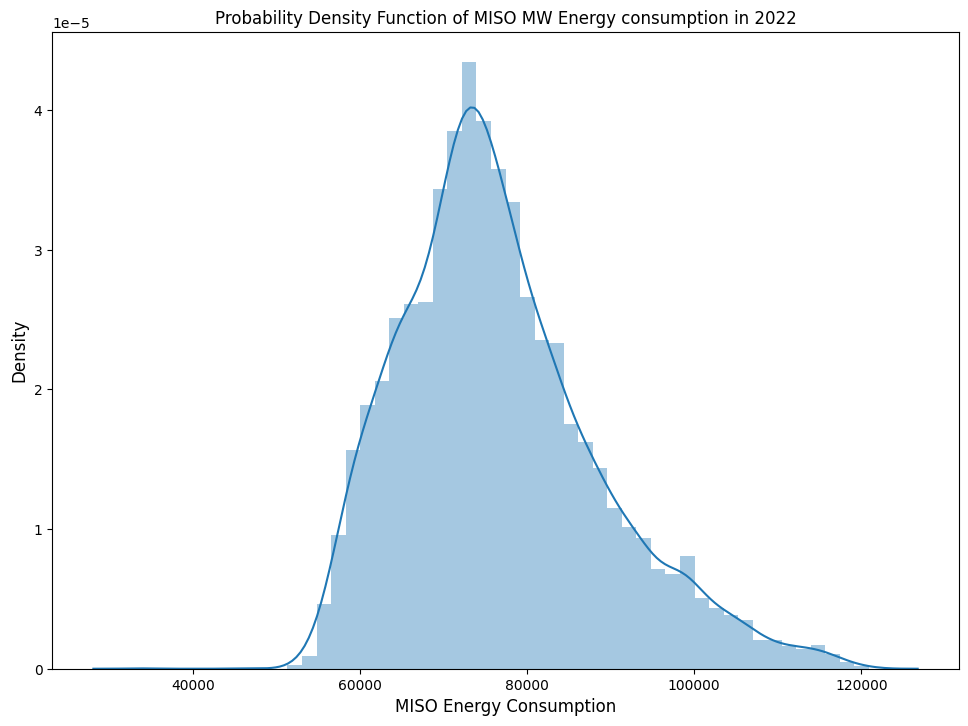

In [103]:
#Displaying the Probability Density function of MISO MW Energy Consumption in 2022
PDFgraph = sns.distplot(df22['ActualLoad'])

PDFgraph.set_xlabel('MISO Energy Consumption', fontsize = 12)
PDFgraph.set_ylabel('Density', fontsize = 12)
PDFgraph.set_title('Probability Density Function of MISO MW Energy consumption in 2022', fontsize = 12)

from matplotlib import rcParams

rcParams['figure.figsize'] = 11.7, 8.2
import warnings
warnings.filterwarnings('ignore')



**24 hour line plot of MISO MW Energy Consumption through out the year 2022**

As you can see from the graph below, peak energy consumption is somewhere around right before 8:00PM and lowest energy consumption is found around 5:00AM.

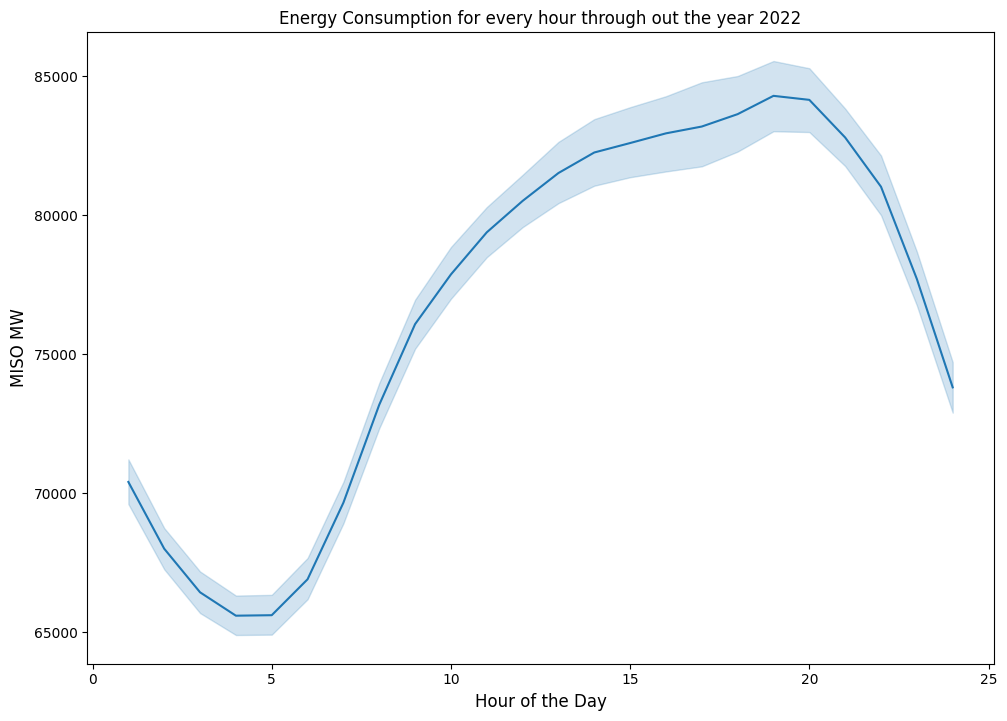

In [104]:
lineplot22 = sns.lineplot(x=df22['HR'], y = df22['ActualLoad'], data = df22)
lineplot22.set_xlabel('Hour of the Day', fontsize = 12)
lineplot22.set_ylabel('MISO MW', fontsize = 12)
lineplot22.set_title('Energy Consumption for every hour through out the year 2022', fontsize = 12)

rcParams['figure.figsize'] = 11.7, 8.2



**Peak Demand for each day in the year 2022**

As you can see by the scatter plot below MISO MW Consumption peaks in the summer season and dips in the winter and fall.

In [105]:
#Finding the peak demand of each day in the year 2022
df221 = df22.groupby(['Date']).max()
df221

,Time,ActualLoad,HR,NewDate,NewMonth
Date,,,,,
2022-01-01,12:00:00 PM,78600.0,24,2022-01-01,1
2022-01-02,12:00:00 PM,87722.0,24,2022-01-02,1
2022-01-03,12:00:00 PM,91947.0,24,2022-01-03,1
2022-01-04,12:00:00 PM,91890.0,24,2022-01-04,1
2022-01-05,12:00:00 PM,89731.0,24,2022-01-05,1
...,...,...,...,...,...
2022-12-27,12:00:00 PM,89681.0,24,2022-12-27,12
2022-12-28,12:00:00 PM,84740.0,24,2022-12-28,12
2022-12-29,12:00:00 PM,75469.0,24,2022-12-29,12


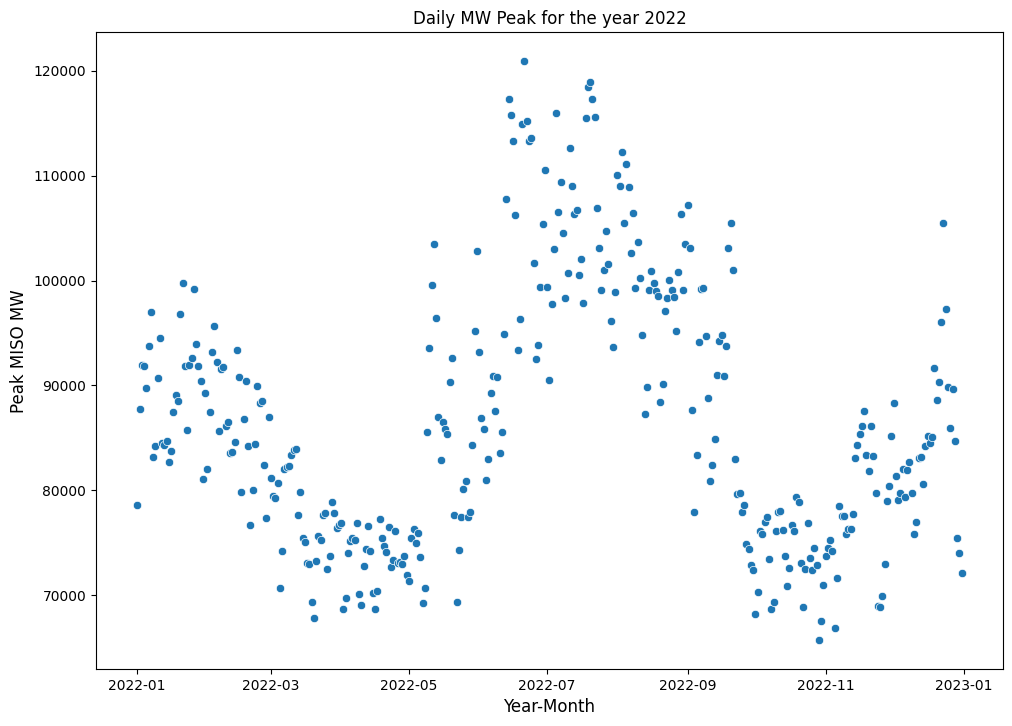

In [111]:
#scatter plot to determine during which months/seasons MW consumptions peaks and dips
dailyPeakGraph = sns.scatterplot(x = df221['NewDate'], y = df221['ActualLoad'], data = df221)
from matplotlib import rcParams

dailyPeakGraph.set_xlabel('Year-Month', fontsize = 12)
dailyPeakGraph.set_ylabel('Peak MISO MW', fontsize = 12)
dailyPeakGraph.set_title('Daily MW Peak for the year 2022', fontsize = 12)

rcParams['figure.figsize'] = 11.7, 8.27


**Line chart to visualizae the varying MW Demands for each month in the year 2022**

In [107]:
#Calculating the peak of demands each month
df222 = df22.groupby('NewMonth').max()
df222.reset_index(inplace = True)
df222

,NewMonth,Date,Time,ActualLoad,HR,NewDate
0,1,2022-01-31,12:00:00 PM,99776.0,24,2022-01-31
1,2,2022-02-28,12:00:00 PM,95711.0,24,2022-02-28
2,3,2022-03-31,12:00:00 PM,83971.0,24,2022-03-31
3,4,2022-04-30,12:00:00 PM,77291.0,24,2022-04-30
4,5,2022-05-31,12:00:00 PM,103488.0,24,2022-05-31
5,6,2022-06-30,12:00:00 PM,120919.0,24,2022-06-30
6,7,2022-07-31,12:00:00 PM,118883.0,24,2022-07-31
7,8,2022-08-31,12:00:00 PM,112216.0,24,2022-08-31
8,9,2022-09-30,12:00:00 PM,107187.0,24,2022-09-30
9,10,2022-10-31,12:00:00 PM,79371.0,24,2022-10-31


In [108]:
#Calculating the lowest demand of each month
df223 = df22.groupby("NewMonth").min()
df223.reset_index()
df223

,Date,Time,ActualLoad,HR,NewDate
NewMonth,,,,,
1,2022-01-01,01:00:00 AM,61962.0,1,2022-01-01
2,2022-02-01,01:00:00 AM,64569.0,1,2022-02-01
3,2022-03-01,01:00:00 AM,57603.0,1,2022-03-01
4,2022-04-01,01:00:00 AM,56112.0,1,2022-04-01
5,2022-05-01,01:00:00 AM,54934.0,1,2022-05-01
6,2022-06-01,01:00:00 AM,56944.0,1,2022-06-01
7,2022-07-01,01:00:00 AM,61524.0,1,2022-07-01
8,2022-08-01,01:00:00 AM,61556.0,1,2022-08-01
9,2022-09-01,01:00:00 AM,56271.0,1,2022-09-01


<function matplotlib.pyplot.show(close=None, block=None)>

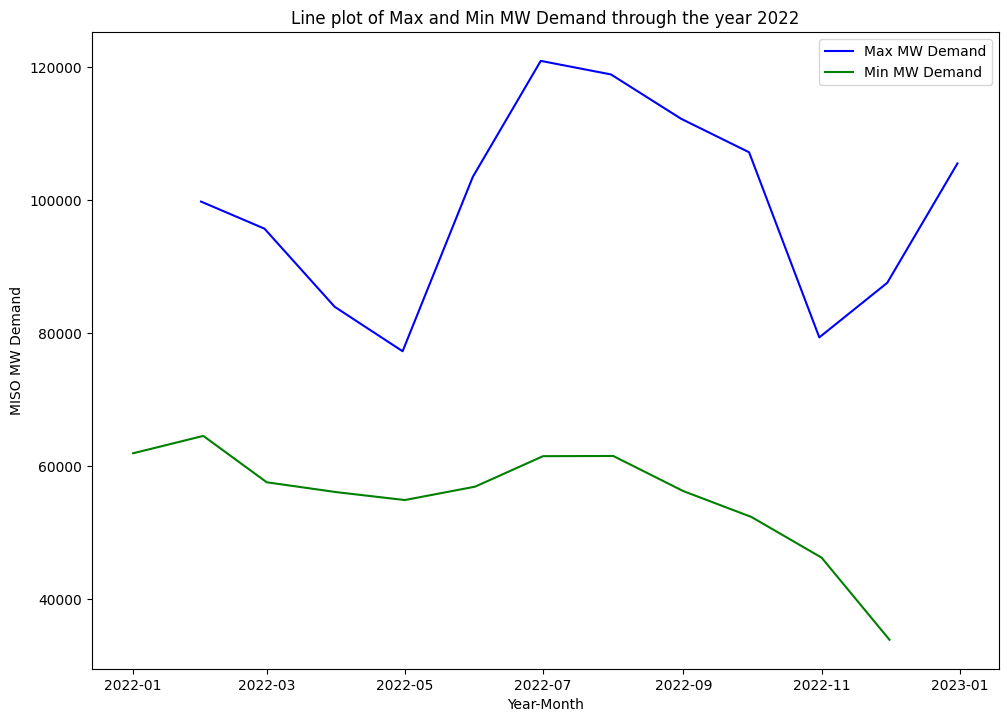

In [110]:
#Creating the line chart

plt.figure()
maxline = plt.plot(df222['NewDate'], df222['ActualLoad'], c = 'blue', label = 'Max MW Demand' )
minlin = plt.plot(df223['NewDate'], df223['ActualLoad'], c = 'green', label = 'Min MW Demand')
plt.legend()
plt.xlabel('Year-Month')
plt.ylabel('MISO MW Demand')
plt.title('Line plot of Max and Min MW Demand through the year 2022')
plt.show